## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


# Maanik Gupta

# Maya Sandlin

# Robert Golden

# Daniel Robles

In [48]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_review = pd.read_csv('zippedData/rt.reviews.csv', encoding='unicode_escape')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)


conn = sqlite3.connect('C:/Users/darobles/Desktop/capstone/AIOverlordSupporters/zippedData/im.db')
cur = conn.cursor()
pd.read_sql('''SELECT * FROM SQLITE_MASTER;''', conn)



,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [49]:
from scipy import stats

In [7]:
rt_movie_info['box_office']

0              NaN
1          600,000
2              NaN
3              NaN
4              NaN
           ...    
1555    33,886,034
1556           NaN
1557           NaN
1558           NaN
1559           NaN
Name: box_office, Length: 1560, dtype: object

In [2]:
#made copy of df to drop Nan values and do some work
movie_info = rt_movie_info.copy()
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,9-Oct-71,25-Sep-01,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,13-Sep-96,18-Apr-00,NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,9-Dec-94,27-Aug-97,NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,18-Aug-06,2-Jan-07,$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,23-Jul-93,17-Apr-01,NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1-Jan-62,11-May-04,NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1-Apr-93,29-Jan-02,NaN,NaN,101 minutes,NaN


In [6]:
#drop records with nan values
movie_info = movie_info.dropna()
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,11-Jan-02,18-Jun-02,$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,27-Apr-06,2-Oct-07,$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,17-Dec-10,5-Apr-11,$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,25-Dec-13,1-Apr-14,$,"20,518,224",127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,23-Dec-11,3-Apr-12,$,"72,700,000",126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,17-Feb-16,21-Jun-16,$,"1,320,005",123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,30-Sep-05,20-Dec-05,$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,5-Oct-12,20-Nov-12,$,"1,416,189",129 minutes,Eros Entertainment


In [11]:
#remove commas
movie_info['box_office']=movie_info['box_office'].str.replace(',','')
movie_info

C:\Users\darobles\AppData\Local\Temp\ipykernel_8456\289546436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info['box_office']=movie_info['box_office'].str.replace(',','')


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,600000,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,11-Jan-02,18-Jun-02,$,41032915,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,27-Apr-06,2-Oct-07,$,224114,123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,17-Dec-10,5-Apr-11,$,1039869,108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,25-Dec-13,1-Apr-14,$,20518224,127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,23-Dec-11,3-Apr-12,$,72700000,126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,17-Feb-16,21-Jun-16,$,1320005,123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,30-Sep-05,20-Dec-05,$,25335935,119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,5-Oct-12,20-Nov-12,$,1416189,129 minutes,Eros Entertainment


In [31]:
action = movie_info[movie_info['genre'].str.contains('Action')]
action_rev=sum(action['box_office'])
action_rev

3575189114.0

In [36]:
drama = movie_info[movie_info['genre'].str.contains('Drama')]
drama_rev=sum(drama['box_office'])
drama_rev

4047723374.0

In [37]:
comedy = movie_info[movie_info['genre'].str.contains('Comedy')]
comedy_rev=sum(comedy['box_office'])
comedy_rev

4134115685.0

In [38]:
horror = movie_info[movie_info['genre'].str.contains('Horror')]
horror_rev=sum(horror['box_office'])
horror_rev

576110189.0

In [57]:
romance = movie_info[movie_info['genre'].str.contains('Romance')]
romance_rev=sum(romance['box_office'])
romance_rev

1664500072.0

In [60]:
top_genres_rev = {'action':action_rev,'drama':drama_rev,'comedy':comedy_rev,'horror':horror_rev,'romance':romance_rev}

Text(0, 0.5, 'Revenue')

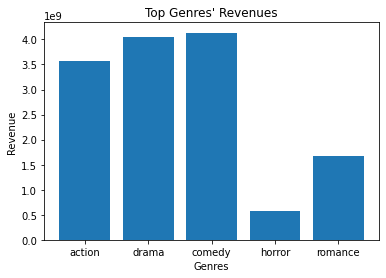

In [61]:
fig, ax=plt.subplots()
ax.bar(top_genres_rev.keys(),top_genres_rev.values() )



ax.set_title("Top Genres' Revenues")
ax.set_xlabel("Genres")
ax.set_ylabel("Revenue")

In [42]:
movie_info['box_office'].mean()

41958400.02127659

In [43]:
comedy['box_office'].mean()

40530545.931372546

In [47]:
comedy['box_office'].std()

54249600.41858846

In [50]:
pop=movie_info['box_office']

In [51]:
sam=comedy['box_office']

In [52]:
alpha = .05

In [53]:
stats.norm.ppf(alpha), stats.norm.ppf(1-alpha)

(-1.6448536269514729, 1.6448536269514722)

In [55]:
stats.ttest_ind(pop,sam)

Ttest_indResult(statistic=0.1999475067200022, pvalue=0.8416429540851095)

In [27]:
sorted_movie_info=movie_info.sort_values(by='box_office',ascending=False)
sorted_movie_info.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
827,1071,This depiction of the last 12 hours in the lif...,R,Drama,Mel Gibson,Mel Gibson|Benedict Fitzgerald,25-Feb-04,31-Aug-04,$,368000000.0,127 minutes,Newmarket Film Group
877,1136,The Hobbit: An Unexpected Journey follows titl...,PG-13,Action and Adventure|Science Fiction and Fantasy,Peter Jackson,Peter Jackson|Philippa Boyens|Guillermo del To...,14-Dec-12,19-Mar-13,$,303001229.0,170 minutes,Warner Bros.
1188,1525,"In Skyfall, Bond's loyalty to M is tested as h...",PG-13,Action and Adventure|Mystery and Suspense,Sam Mendes,John Logan|Robert Wade|Neal Purvis,9-Nov-12,11-Mar-13,$,299300000.0,145 minutes,MGM
690,883,"Now that Greg Focker is ""in"" with his soon-to-...",PG-13,Comedy,Jay Roach,Jim Herzfeld|John Hamburg,22-Dec-04,26-Apr-05,$,279167575.0,118 minutes,Universal Pictures
1117,1442,Youthful wizard Harry Potter returns to the sc...,PG,Kids and Family|Science Fiction and Fantasy,Chris Columbus,Steve Kloves,15-Nov-02,11-Apr-03,$,261835892.0,161 minutes,Warner Bros. Pictures
504,661,One woman's rocky road to the altar gets playe...,PG,Comedy|Romance,Joel Zwick,Nia Vardalos,19-Apr-02,11-Feb-03,$,241250669.0,95 minutes,IFC Films
657,841,This is a contemporary retelling of H.G. Wells...,PG-13,Action and Adventure|Science Fiction and Fantasy,Steven Spielberg,Josh Friedman|David Koepp,29-Jun-05,22-Nov-05,$,234141872.0,117 minutes,Paramount Pictures
1458,1877,A hard-drinking lush finds himself thrust into...,PG-13,Action and Adventure|Comedy|Drama,Peter Berg,Vincent Gilligan|Vince Gilligan|Vy Vincent Ngo,16-Jun-08,25-Nov-08,$,227946274.0,92 minutes,Columbia Pictures
1237,1600,When a failed assassination attempt occurs on ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Bryan Singer,Daniel Harris|Dan Harris|Michael Dougherty|Bry...,2-May-03,25-Nov-03,$,214813155.0,134 minutes,20th Century Fox
1331,1722,Former cop Brian O'Conner (Paul Walker) partne...,PG-13,Action and Adventure|Drama|Mystery and Suspense,Justin Lin,Chris Morgan,29-Apr-11,4-Oct-11,$,209805005.0,131 minutes,Universal Pictures


In [2]:
##part 1 of creating csv out of sql table movie_basics
sql_query = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM movie_basics
                               ''', conn)
sql_query

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [3]:
##part 2 of creating csv out of sql table movie_basics
basics_df = pd.DataFrame(sql_query, columns = ['movie_id', 'primary_title', 'original_title','start_year','runtime_minutes','genres'])
basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


# Jake Umholtz 